In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import uproot as up
import numpy as np
import math

In [3]:
def rindex20(x, xUV, xIR):
    a0 = 0.335
    aUV = 0.099
    aIR = 0.008
    A = a0 + aUV*x**2/(x**2-xUV**2) + aIR*x**2/(x**2-xIR**2)
    return np.sqrt(1+3*A/(3-A))

Text(0, 0.5, 'rindex')

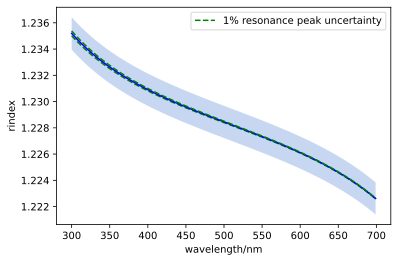

In [86]:
width, peak1, peak2 = 5, 106.6, 908.3

wavelength, rindex, rindex11, rindex12, rindex21, rindex22 = [], [], [], [], [], []
width = peak1 * 0.01
for i in range(300, 700):
    wavelength.append(i)
    rindex.append(rindex20(i, peak1, peak2))
    rindex11.append(rindex20(i, peak1-width, peak2))
    rindex12.append(rindex20(i, peak1+width, peak2))

plt.plot(wavelength, rindex11, "--", color='green', label="1% resonance peak uncertainty")
plt.plot(wavelength, rindex, "-", color='blue')
plt.plot(wavelength, rindex12, "--", color='green')
plt.fill_between(wavelength, np.array(rindex)*0.999, np.array(rindex)*1.001,alpha=0.3)
#plt.vlines(128, 1.3, 1.45, color='darkviolet')
#plt.text(130, 1.37, "1% uncertainty zone", color='royalblue')
#plt.text(400, 1.27, "1% uncertainty zone", color='royalblue')
#plt.text(128.5, 1.425, "128nm", color='darkviolet')
plt.legend()
plt.xlabel('wavelength/nm')
plt.ylabel('rindex')
#plt.savefig('rindexErrorZoomout.pdf')

In [6]:
# Fresnel Corrections Uncertainty :
def window_rindex(x, a, b, E0, E1, g):
    E = 1240/x # unit: 
    return np.sqrt(1+a*(E0**2-E**2)/((E0**2-E**2)**2+g**2*E**2) + b/(E1**2-E**2))

def fresnel(x, lar, mgf2):
    A = 1 - ((1-mgf2)/(1+mgf2))**2
    B = 1 - ((mgf2-lar)/(mgf2+lar))**2
    return (B/A)**2

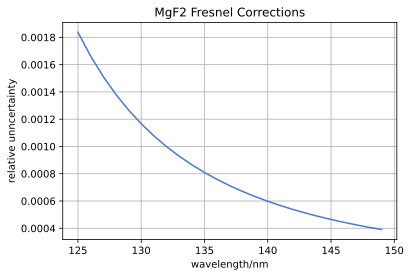

In [105]:
## Fresnel Correction Uncertainty :
r1, r2, r3, r4, r5, r6 = [], [], [], [], [], []
f1, f2, f3, f4, f5, f6 = [], [], [], [], [], []
wl = [i for i in range(125, 150)]
data = [rindex20(i, 106.6, 908.3) for i in wl]
for j, i in enumerate(wl):
    #wl.append(i)
    r1.append(window_rindex(i, 29, 308.978, 11.8978, 21.3297, 0.34551))
    r2.append(window_rindex(i, 29, 306.261, 11.9203, 21.2337, 0.33249))
    r3.append(window_rindex(i, 29, 305.007, 11.9557, 21.1716, 0.32893))
    r4.append(window_rindex(i, 29, 300.471, 11.9906, 21.0044, 0.30037))
    r5.append(window_rindex(i, 29, 293.252, 12.0275, 20.7504, 0.25690))
    r6.append(window_rindex(i, 29, 295.855, 12.0226, 20.8448, 0.35940))

    f1.append(fresnel(i, data[j], r1[-1]))
    f2.append(fresnel(i, data[j], r2[-1]))
    f3.append(fresnel(i, data[j], r3[-1]))
    f4.append(fresnel(i, data[j], r4[-1]))
    f5.append(fresnel(i, data[j], r5[-1]))
    f6.append(fresnel(i, data[j], r6[-1]))

plt.style.use("seaborn-muted")

plt.savefig("Fresnel-rela.pdf")

"""
plt.plot(wl, f1, "--", ms=4, label="25 deg")
plt.plot(wl, f2, '--', ms=4, label='0 deg')
plt.plot(wl, f3, '--', ms=4, label='-50 deg')
plt.plot(wl, f4, '--', ms=4, label='-100 deg')
plt.plot(wl, f5, '--', ms=4, label='-150 deg')
plt.plot(wl, f6, '--', ms=4, label='-193 deg')

plt.legend(loc='lower left')
plt.xlabel("wavelength/nm")
plt.ylabel("fresnel correction")
plt.title("MgF2")
plt.savefig('Fresnel_MgF2.pdf')

"""
plt.plot(wl, (np.array(f1)-np.array(f6))/np.array(f5), "-", ms=5 )
plt.xlabel("wavelength/nm")
plt.ylabel("relative unncertainty")
plt.title("MgF2 Fresnel Corrections")
plt.grid(True)
#plt.savefig('Fresnel_rela.pdf')


In [7]:
def lraymodel(x, n):
    #kT = 2.18E-9
    kT = 2.24442E-9
    kB = 1.380649E-23
    T = 90
    f = 1E22
    return 1/(8*np.pi**3/3/x**4 * ((n**2-1)*(n**2+2)/3)**2 *kB *kT *T *f)

Text(0, 0.5, '$A_{Ray}$')

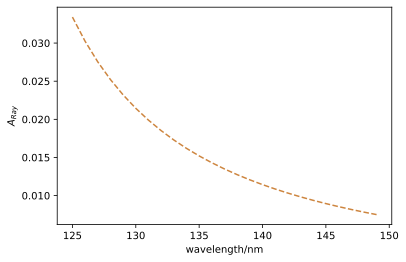

In [112]:
wl = [i for i in range(125, 150)]
rayl, trans, absor = [], [], []
d = 5.8
for i in wl:
    n = rindex20(i, 106.6, 908.3) 
    rayl.append(lraymodel(i/1000., n))
    trans.append( np.exp(-d/rayl[-1]) )
    absor.append(-(np.log(trans[-1]))/(np.log(10)))

plt.plot(wl, absor, "--", color='peru')
plt.xlabel("wavelength/nm")
plt.ylabel(r"$A_{Ray}$")

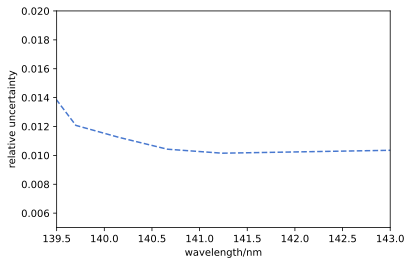

In [138]:
wl, absor1, absor2 = [], [], []
with open("./XeDopedAbs.csv") as f:
    for lines in f.readlines():
        line = lines.strip('\n')
        data = line.split(' ')
        wl.append(float(data[0]))
        absor1.append(float(data[1]))
for j,i in enumerate(wl):
    n = rindex20(i, 106.6, 908.3) 
    rayl = (lraymodel(i/1000., n))
    trans = ( np.exp(-d/rayl) )
    absor2.append(absor1[j]+(np.log(trans))/(np.log(10)))

#plt.plot(wl, absor1, "o-", ms=4, label="raw data")
#plt.plot(wl, absor2, "o-", ms=4, label="corr data")
#plt.legend()
plt.plot(wl, (np.array(absor1)-np.array(absor2))/np.array(absor1), "--" )
plt.xlim(139.5, 143)
plt.ylim(0.005, 0.02)
plt.xlabel("wavelength/nm")
plt.ylabel("relative uncertainty")
#plt.ylabel(r"$A_{abs}$")
plt.savefig("rela_abspeak2.pdf")

(-0.005, 0.001)

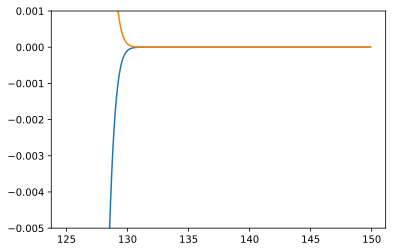

In [25]:
wl = np.arange(125, 150, 0.1)
trans, trans1, trans2 = [], [], []
m1, s1, a2, m2, s2 = 1.26511e+02, 1.00448, 4.17104e-01, 1.40121e+02, 1.54038
R = 0.947
err = 0.0417
for i in wl:
    n = rindex20(i, 106.6, 908.3)
    rayl = lraymodel(i/1000., n)
    r5 = window_rindex(i, 29, 293.252, 12.0275, 20.7504, 0.25690)
    f5 = fresnel(i, n, r5)
    g1 = a2*R*np.exp(-(i-m1)**2/2/s1**2)
    g2 = a2*np.exp(-(i-m2)**2/2/s2**2)
    trans.append(f5 * np.power(10, -g1) * np.power(10, -g2) * np.exp(-5.8/rayl) )
    g1 = a2*R*(1+err)*np.exp(-(i-m1)**2/2/s1**2)
    trans1.append(f5 * np.power(10, -g1) * np.power(10, -g2) * np.exp(-5.8/rayl) )
    g1 = a2*R*(1-err)*np.exp(-(i-m1)**2/2/s1**2)
    trans2.append(f5 * np.power(10, -g1) * np.power(10, -g2) * np.exp(-5.8/rayl) )

trans = np.array(trans)
trans1 = np.array(trans1)
trans2 = np.array(trans2)

#plt.plot(wl, trans, "-", color='blue')
#plt.plot(wl, trans1, "--", color='green')
#plt.plot(wl, trans2, "--", color='green')

